In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#Reading the data
data1 = pd.read_excel('osnaca-data.xlsx')

In [38]:
# Looking the first 5 rows of the dataset
data1.head()

,Sample,Code,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,...,Y,Zn,B,Hf,Si,Zr,Be,Ga,Ge,Wt Tot
0,700001,NaN,0.438,0.002,0.002,0.362,10.60,0.02,0.39,91.5,...,1.2,153000,-20,0.4,34200,60,-1.0,11.0,1,159
1,700002,NaN,0.093,0.001,0.002,0.095,125.00,0.22,0.12,44.0,...,18.5,3780,-20,0.2,114000,20,-1.0,2.0,-1,143
2,700003,NaN,1.41,0.002,0.002,1.39,120.00,0.02,62.9,215.0,...,0.3,219000,-20,-0.2,71500,-10,-1.0,-1.0,2,204
3,700004,1,0.096,0.003,0.005,0.086,0.72,0.80,0.03,2.5,...,6.3,755,-20,2.0,244000,70,-1.0,-1.0,-1,185
4,700005,NaN,2.9,0.003,0.005,3.94,0.34,0.06,4.01,162.0,...,4.5,173000,-20,-0.2,142000,-10,-1.0,-1.0,2,280


In [5]:
list_of_columns=data1.columns

In [6]:
df = data1.iloc[:, 2:68]

In [7]:
#Checking NA values
df.isna().any()

Au (FA)    False
Pt         False
Pd         False
Au (AR)    False
Bi         False
           ...  
Si         False
Zr         False
Be         False
Ga         False
Ge         False
Length: 66, dtype: bool

There is no missing values in the dataset

In [8]:
list_of_columns = df.columns

In [9]:
list_of_columns

Index(['Au (FA)', 'Pt', 'Pd', 'Au (AR)', 'Bi', 'Te', 'Hg', 'Ag', 'Al', 'As',
       'Ca', 'Cd', 'Co', 'Cr', 'Cs', 'Cu', 'Fe', 'In', 'K', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Li',
       'Mg', 'Mn', 'Mo', 'Na', 'Nb', 'Ni', 'P', 'Pb', 'Rb', 'Re', 'S', 'Sb',
       'Sc', 'Se', 'Sn', 'Sr', 'Ta', 'Th', 'Ti', 'Tl', 'U', 'V', 'W', 'Y',
       'Zn', 'B', 'Hf', 'Si', 'Zr', 'Be', 'Ga', 'Ge'],
      dtype='object')

In [10]:
list(df.dtypes)

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('

### Cleaning and transforming data

In [39]:
# Convert values IS into 0
df=df.replace("IS", 0)

#### Convert columns with Object type into numeric values

In [12]:
df['Hg'] = pd.to_numeric(df['Hg'])

In [13]:
df['Au (FA)'] = pd.to_numeric(df['Au (FA)'])
df['Pt'] = pd.to_numeric(df['Pt'])

In [14]:
df['Au (AR)'] = pd.to_numeric(df['Au (AR)'])
df['Pd'] = pd.to_numeric(df['Pd'])

In [48]:
list_of_coefficient1=[]
for i in list_of_columns:
    list_of_coefficient1.append([df['In'].corr(df[i]),"In and",i])
sorted(list_of_coefficient1)[-20:]

[[-0.006386544013555623, 'In and', 'Ta'],
 [-0.005191047276819587, 'In and', 'Ge'],
 [-5.151955956000141e-05, 'In and', 'Re'],
 [-4.234562950034929e-05, 'In and', 'Bi'],
 [0.003983784829426945, 'In and', 'Hg'],
 [0.010191913192729656, 'In and', 'B'],
 [0.010218317683510237, 'In and', 'Co'],
 [0.01217541538982025, 'In and', 'W'],
 [0.013989797880660364, 'In and', 'Mn'],
 [0.015830000510246797, 'In and', 'Sb'],
 [0.025514380636737416, 'In and', 'As'],
 [0.03168495120819973, 'In and', 'Cd'],
 [0.0442381816956692, 'In and', 'Ag'],
 [0.05121360522361913, 'In and', 'Sn'],
 [0.0821343879091581, 'In and', 'Zn'],
 [0.12833377659445944, 'In and', 'Fe'],
 [0.16027686870875646, 'In and', 'Cu'],
 [0.16726549564005386, 'In and', 'Se'],
 [0.22508251841161628, 'In and', 'S'],
 [1.0, 'In and', 'In']]

In [45]:
list_of_coefficient2=[]
for i in list_of_columns:
    list_of_coefficient2.append([df['Ge'].corr(df[i]),"Ge and",i])
sorted(list_of_coefficient2)[-20:]

[[0.02169335802029915, 'Ge and', 'Cs'],
 [0.023337896408367306, 'Ge and', 'Li'],
 [0.02618452719780418, 'Ge and', 'Nb'],
 [0.029777181942877175, 'Ge and', 'Ca'],
 [0.04226196403100871, 'Ge and', 'Tb'],
 [0.053833882466501996, 'Ge and', 'Gd'],
 [0.062004102384672466, 'Ge and', 'Eu'],
 [0.06504486968490908, 'Ge and', 'Sm'],
 [0.06546116088666841, 'Ge and', 'La'],
 [0.06912729697218406, 'Ge and', 'Ce'],
 [0.07151444246304384, 'Ge and', 'Pr'],
 [0.07155055563919545, 'Ge and', 'Nd'],
 [0.0911700737333686, 'Ge and', 'Pb'],
 [0.11400795598541562, 'Ge and', 'Se'],
 [0.1526998361174825, 'Ge and', 'Ga'],
 [0.1772241749496121, 'Ge and', 'Tl'],
 [0.20236794721275347, 'Ge and', 'S'],
 [0.22426566361241615, 'Ge and', 'Cd'],
 [0.49466389070875494, 'Ge and', 'Zn'],
 [0.9999999999999998, 'Ge and', 'Ge']]

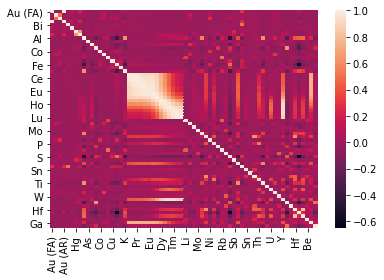

In [17]:
sns.heatmap(df.corr());


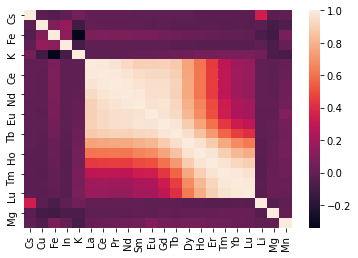

In [18]:
#Zoom in the high significant correlation area
df2 = data1.iloc[:, 16:38]
sns.heatmap(df2.corr());

## Implement Feature Selection

Target variable is Indium

In [19]:
X = df.drop(['In'], axis =1)
y = df['In']

[0.00327073 0.00578005 0.0041468  0.00149928 0.02747653 0.00989144
 0.01188075 0.04790979 0.00510182 0.01317714 0.00803026 0.01634455
 0.02910159 0.00160638 0.0065461  0.05156054 0.01419782 0.00544684
 0.0131986  0.00478816 0.00370152 0.00681708 0.00443492 0.00682095
 0.00472647 0.00497382 0.00779547 0.01239723 0.00976822 0.01525205
 0.00839829 0.01107756 0.01570501 0.00179719 0.02434754 0.00443468
 0.00466786 0.01867479 0.00663445 0.00185906 0.00382559 0.00821363
 0.00426014 0.04192562 0.05735341 0.0030884  0.03849148 0.26485321
 0.00179111 0.00771095 0.00760251 0.01437028 0.01390472 0.00442386
 0.00362664 0.01289561 0.00953677 0.01419013 0.0031694  0.00509008
 0.00561058 0.00700876 0.00312836 0.00424007 0.00444936]


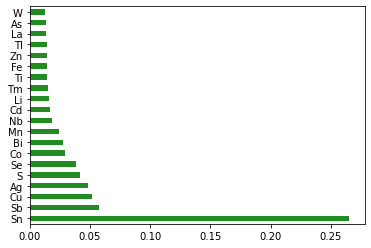

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use built-in class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color="Forestgreen")
plt.show()

### Compared the result of correlation coefficient

In [21]:
# Show list of most significant correlations between Indium and other chemical elements.
list_of_coefficient1=[]
for i in list_of_columns:
    list_of_coefficient1.append([df['In'].corr(df[i]),"In and",i])
sorted(list_of_coefficient1)[-20:]

[[-0.006386544013555623, 'In and', 'Ta'],
 [-0.005191047276819587, 'In and', 'Ge'],
 [-5.151955956000141e-05, 'In and', 'Re'],
 [-4.234562950034929e-05, 'In and', 'Bi'],
 [0.003983784829426945, 'In and', 'Hg'],
 [0.010191913192729656, 'In and', 'B'],
 [0.010218317683510237, 'In and', 'Co'],
 [0.01217541538982025, 'In and', 'W'],
 [0.013989797880660364, 'In and', 'Mn'],
 [0.015830000510246797, 'In and', 'Sb'],
 [0.025514380636737416, 'In and', 'As'],
 [0.03168495120819973, 'In and', 'Cd'],
 [0.0442381816956692, 'In and', 'Ag'],
 [0.05121360522361913, 'In and', 'Sn'],
 [0.0821343879091581, 'In and', 'Zn'],
 [0.12833377659445944, 'In and', 'Fe'],
 [0.16027686870875646, 'In and', 'Cu'],
 [0.16726549564005386, 'In and', 'Se'],
 [0.22508251841161628, 'In and', 'S'],
 [1.0, 'In and', 'In']]

## *Multiple Linear Regression Model Implementation*

### Model with all independent variables

In [26]:
#Spliting the dataset
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [27]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred_mlr= mlr.predict(X_test)

In [29]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head(10)

,Actual value,Predicted value
54,0.06,-184.038181
824,0.02,-3.699913
866,0.04,-0.762796
316,1.02,7.562100
256,0.02,3.065214
355,0.04,-0.940220
6,0.34,21.117462
447,0.12,3.322951
594,0.02,10.350922
153,0.20,5.677735


In [30]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 6.29
Mean Absolute Error: 9.932919158366708
Mean Square Error: 1079.796292844345
Root Mean Square Error: 32.860253998475805


## *Random Forrest Regression Model Implementation*

### Model with all independent variables

In [31]:
X = df.drop(['In'], axis =1)
y = df['In']

In [32]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [33]:
#Import Random Forest Regressor module
from sklearn.ensemble import RandomForestRegressor
# Create a based model
rf = RandomForestRegressor(min_samples_leaf=10,min_samples_split=15,n_estimators=5,random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=10, min_samples_split=15, n_estimators=5,
                      random_state=42)

In [34]:
#Fit test set into the model
rf_ytest_pred = rf.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error
MAE_test = mean_absolute_error(y_test, rf_ytest_pred)
print('MAE from the testing set: ',MAE_test)

MAE from the testing set:  6.730761037163457


In [36]:
rf_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': rf_ytest_pred})
rf_diff.head(10)

,Actual value,Predicted value
633,1.42,7.953610
927,0.04,0.062550
9,0.14,12.218138
391,-0.02,-0.020000
1124,3.60,76.570605
878,0.04,0.062063
402,0.04,0.251531
1020,0.32,0.230515
837,0.20,2.246570
428,0.10,0.169654


In [37]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, rf_ytest_pred)
meanSqErr = metrics.mean_squared_error(y_test, rf_ytest_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, rf_ytest_pred))
print('R squared: {:.2f}'.format(rf.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 46.02
Mean Absolute Error: 6.730761037163457
Mean Square Error: 386.4498164598731
Root Mean Square Error: 19.658326898794645
